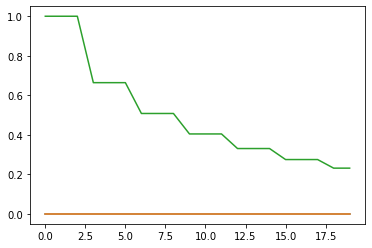

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
def toss(p):
  x=random.randint(1, 100)
  if (x>100*p):
    return 0
  else:
    return 1
a=0.2
b=0.4
c=0.7
N=20
w=[0]*N
s_=[0]*1000
s=[0]*N
for N1 in range(N):
  for l in range(1000):
    na=0
    nb=0
    nc=0
    N1_=math.floor(N1/3)
    for i in range(N1_):
      if toss(a):
        na=na+1
    for j in range(N1_):
      if toss(b):
        nb=nb+1
    for k in range(N1_):
      if toss(c):
        nc=nc+1
nx=max(na,nb,nc)
if(nx==na):
  w[N1]=w[N1]+1
  for i1 in range(N-N1):
    if toss(a):
      na=na+1
    elif(nx==nb):
      w[N1]=w[N1]+1
      for j1 in range(N-N1):
        if toss(b):
          nb=nb+1
    else:
      for k1 in range(N-N1):
        if toss(c):
          nc=nc+1
    s_[l]=na+nb+nc
  s[N1]=np.mean(s_)
x=np.arange(0,N,1)
y=np.array([s[n] for n in x])
plt.plot(x,y)
y1=np.array([w[n]/1000 for n in x])
plt.plot(x,y1)
w_=[0]*N
for p_ in range(N):
  n1=math.floor(p_/3)
  for k_ in range(n1+1):
    s1=0
    s2=0
    for r in range(k_):
        s1=s1+pow(1-b,n1-r)*pow(b,r)*math.comb(n1,r)
        s2=s2+pow(1-a,n1-r)*pow(a,r)*math.comb(n1,r)
    w_[p_]=w_[p_]+math.comb(n1,k_)*pow(c,k_)*pow(1-c,n1-k_)*s1*s2
  w_[p_]=1-w_[p_]
y2=np.array([w_[n] for n in x])
plt.plot(x,y2)

The sample average of the total rewards = 3495.447999999998
The best expectation would be = 5000x0.7 = 3500


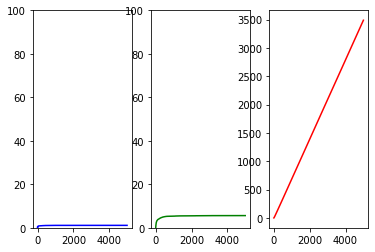

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
def hoeff(N,pa,pb,pc,alpha):
  avg1=[0]*5000
  avg2=[0]*5000
  avg3=[0]*5000
  avg_reward=0
  trials=500
  for i in range(trials):
    coins = [[1,0,pa,1],[1,0,pb,1],[1,0,pc,1]] #coins[na,ka,pa,ua]
    n=3
    if random.random()<coins[0][2]:
      coins[0][1]+=1
      avg1[0]+=1/trials
    if random.random()<coins[1][2]:
      coins[1][1]+=1
      avg2[1]+=1/trials
    if random.random()<coins[2][2]:
      coins[2][1]+=1
      avg3[2]+=1/trials
    for j in range(4,5001):
      coins[0][3] = math.sqrt(math.log(1/alpha)/(2*coins[0][0]))+coins[0][1]/coins[0][0]
      coins[1][3] = math.sqrt(math.log(1/alpha)/(2*coins[1][0]))+coins[1][1]/coins[1][0]
      coins[2][3] = math.sqrt(math.log(1/alpha)/(2*coins[2][0]))+coins[2][1]/coins[2][0]
      n+=1
      maxp = max(row[3] for row in coins)
      ua_list=[0]*3
      for i in range(3):
        ua_list[i]=coins[i][3]
      index = ua_list.index(maxp)
      coins[index][0]+=1
      if random.random()<coins[index][2]:
        coins[index][1]+=1
      avg1[j-1]+=coins[0][1]/trials
      avg2[j-1]+=coins[1][1]/trials
      avg3[j-1]+=coins[2][1]/trials
      if n==N:
        break
    avg_reward+=(coins[0][1]+coins[1][1]+coins[2][1])/trials
  plt.subplot(1,3,1)
  plt.plot(np.arange(0,5000),avg1,'blue')
  plt.subplot(1,3,1).set_ylim(0, 100)
  plt.subplot(1,3,2)
  plt.plot(np.arange(0,5000),avg2,'green')
  plt.subplot(1,3,2).set_ylim(0, 100)
  plt.subplot(1,3,3)
  plt.plot(np.arange(0,5000),avg3,'red')
  print('The sample average of the total rewards = '+str(avg_reward))
hoeff(5000,0.2,0.4,0.7,0.1)
print('The best expectation would be = 5000x0.7 = 3500')

-0.6580092608290187
3.925858798008378
-1.384774395158658
3.758979908854116
0.07534165346781663
4.351940165945897


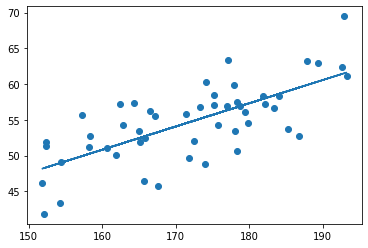

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
x=np.array([161.8917578714209,
  175.20557024887373,
  164.2676553766112,
  178.7222340341774,
  178.00073820784604,
  173.2772419681515,
  160.59676770218624,
  192.65051786762572,
  165.16827896723976,
  186.83322519192234,
  158.3181312404598,
  152.40314131522246,
  176.96604318719778,
  174.1476319971853,
  165.64381551861507,
  178.33112793512723,
  167.63588343343207,
  158.2518544667988,
  162.39631147040325,
  164.93377167203346,
  185.23966651457155,
  174.00884801974885,
  178.29163623554024,
  154.42607294132182,
  152.02373388539078,
  171.35451719883235,
  172.46880217666438,
  187.8259234866104,
  165.8348672259168,
  154.21715210274448,
  183.99341334642781,
  192.96899615398104,
  193.24767230032984,
  152.34085565439042,
  177.86128609011809,
  167.1786624519332,
  183.32867104686477,
  189.32630987297262,
  171.8239506780645,
  162.7533361998475,
  181.8937717199068,
  151.81355565372678,
  175.70637064056112,
  179.82951362312016,
  179.39069884595247,
  177.08397660941904,
  182.1282175100166,
  175.2020315276609,
  166.4430523185654,
  157.22110851705304])
y=np.array([50.06513915417443
  ,57.08997118968728
  ,57.34038829783626
  ,56.88540143502565
  ,53.478696908960934
  ,56.768169670936345
  ,50.98936280545692
  ,62.35249986686582
  ,51.88319410967615
  ,52.674703814115304
  ,52.69023951205429
  ,51.27488019363186
  ,56.878634760999624
  ,60.283919884274155
  ,46.438146326369136
  ,57.504487839354574
  ,45.744829489560345
  ,51.17557752289022
  ,57.227062735277805
  ,53.41123363598972
  ,53.7655228010482
  ,48.77457857823918
  ,50.57295828987031
  ,49.109738459110076
  ,41.84216598976299
  ,55.871446827859636
  ,52.03636592100854
  ,63.228012473952845
  ,52.497642699508894
  ,43.42309786298475
  ,58.2807014841803
  ,69.4769468120694
  ,61.140432492527324
  ,51.89160705026108
  ,59.88218450922603
  ,55.475816112146205
  ,56.65606435614058
  ,62.99451248585423
  ,49.64889204896306
  ,54.28403891707874
  ,58.38375250582365
  ,46.20229138646405
  ,54.28590662636416
  ,54.51621196857059
  ,56.063543839297886
  ,63.33081820162695
  ,57.229870486518834
  ,58.40650863480111
  ,56.285176888103265
  ,55.73018000987019])
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
y1=[50.84083481424745
  ,50.014150611241
  ,47.434433994546275
  ,48.18509369914934
  ,49.47940437427491
  ,51.46395679542809
  ,50.92745554133917
  ,50.05313719206625
  ,44.32619446516681
  ,58.43082902641991
  ,51.78016307917405
  ,44.02198762936742
  ,50.72446115642888
  ,50.705517805027014
  ,57.59462421345118
  ,54.470110375852684
  ,53.22931789122948
  ,51.774125788427334
  ,54.474225400616
  ,48.6041391956155
  ,45.39272640839777
  ,44.650940250705666
  ,42.69887479467695
  ,47.003806810494126
  ,48.146952021872984]
m1=(sum(y1)/len(y1))
y1_=155*a+b
e1=y1_-m1
print(e1)
print(statistics.pstdev(y1))
y2=[56.09178233874335
  ,53.45028077511345
  ,53.921575413701156
  ,48.85934258973829
  ,56.95307675637719
  ,58.34536050529028
  ,58.38396662842817
  ,59.53843135500536
  ,63.86284924117021
  ,50.37873251772672
  ,53.542546379774144
  ,55.65272988547241
  ,56.19834658523187
  ,49.931028628110056
  ,49.067210771486366
  ,57.081250056851644
  ,52.941790056077416
  ,50.11083820970033
  ,52.196245895572396
  ,52.86016951388828
  ,52.997389807842836
  ,50.77474626914866
  ,47.91793610117185
  ,51.317062516525056
  ,53.34045945347973]
m2=(sum(y2)/len(y2))
y2_=165*a+b
e2=y2_-m2
print(e2)
print(statistics.pstdev(y2))
y3=[58.7729713699485
  ,57.52174253372618
  ,46.63896463839615
  ,60.08699337124898
  ,54.97048946487911
  ,50.89015721919731
  ,51.16430051196914
  ,60.44417409273054
  ,47.330206543798724
  ,58.62280875417217
  ,51.94075563649851
  ,53.85545926849789
  ,55.19225332108357
  ,57.316954222269885
  ,61.96906592544718
  ,64.45515173613902
  ,58.145794819284355
  ,52.00153353928704
  ,53.687784624881914
  ,54.467373628898336
  ,54.83437188336155
  ,58.39119923096617
  ,52.72810010849628
  ,53.5992234950328
  ,61.30297365392382]
m3=(sum(y3)/len(y3))
y3_=175*a+b
e3=y3_-m3
print(e3)
print(statistics.pstdev(y3))